### Startup Success Prediction ###


**About Dataset**

Context:
A startup or start-up is a company or project begun by an entrepreneur to seek, develop, and validate a scalable economic model. While entrepreneurship refers to all new businesses, including self-employment and businesses that never intend to become registered, startups refer to new businesses that intend to grow large beyond the solo founder. 

Startups face high uncertainty and have high rates of failure, but a minority of them do go on to be successful and influential. 

Some startups become unicorns: privately held startup companies valued at over US$1 billion.

**The objective**

Predict whether a startup which is currently operating turns into a success or a failure. The success of a company is defined as the event that gives the company's founders a large sum of money through the process of M&A (Merger and Acquisition) or an IPO (Initial Public Offering). A company would be considered as failed if it had to be shut down.

**About the Data**

The data contains industry trends, investment insights and individual company information. There are 48 columns/features. Some of the features are:

- age_first_funding_year – quantitative
- age_last_funding_year – quantitative
- relationships – quantitative
- funding_rounds – quantitative
- funding_total_usd – quantitative
- milestones – quantitative
- age_first_milestone_year – quantitative
- age_last_milestone_year – quantitative
- state – categorical
- industry_type – categorical
- has_VC – categorical
- has_angel – categorical
- has_roundA – categorical
- has_roundB – categorical
- has_roundC – categorical
- has_roundD – categorical
- avg_participants – quantitative
- is_top500 – categorical
- status(acquired/closed) – categorical (the target variable, if a startup is ‘acquired’ by some other organization, means the startup succeed) 

#### 1. Import the necessary libraires

In [137]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

##### 2. Loading the database

In [138]:
#Make sure you're aware of the current working directory in your Jupyter notebook.
import os
print(os.getcwd())

/Users/gabrielaarzate/Desktop/predicting_startup_succes/notebook


In [139]:
# Assuming this notebook is in the 'notebook' directory
notebook_directory = '/Users/gabrielaarzate/Desktop/predicting_startup_succes/notebook'

In [140]:
# Construct the full file path from the notebook directory
file_path = os.path.join(notebook_directory, '..', 'data', 'startup.csv')

#### 2.Read the data

In [141]:
# It's time to read in our training and testing data using pd.read_csv, 
#and take a first look using the describe() function.
data = pd.read_csv(file_path, encoding="ISO-8859-1")

##### 3. Explore the data :

In [142]:
data.describe(include="all")

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
count,923.000000,923,923.000000,923.000000,923,923,923,430,923,923.000000,...,923,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923
unique,NaN,35,NaN,NaN,382,922,221,252,922,NaN,...,922,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,CA,NaN,NaN,94107,c:28482,San Francisco,San Francisco CA 94105,Redwood Systems,NaN,...,c:28482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,acquired
freq,NaN,488,NaN,NaN,30,2,128,12,2,NaN,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,597
mean,572.297941,NaN,38.517442,-103.539212,NaN,NaN,NaN,NaN,NaN,0.646804,...,NaN,0.326111,0.254605,0.508126,0.392199,0.232936,0.099675,2.838586,0.809317,NaN
std,333.585431,NaN,3.741497,22.394167,NaN,NaN,NaN,NaN,NaN,0.478222,...,NaN,0.469042,0.435875,0.500205,0.488505,0.422931,0.299729,1.874601,0.393052,NaN
min,1.000000,NaN,25.752358,-122.756956,NaN,NaN,NaN,NaN,NaN,0.000000,...,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,NaN
25%,283.500000,NaN,37.388869,-122.198732,NaN,NaN,NaN,NaN,NaN,0.000000,...,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,1.000000,NaN
50%,577.000000,NaN,37.779281,-118.374037,NaN,NaN,NaN,NaN,NaN,1.000000,...,NaN,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.500000,1.000000,NaN
75%,866.500000,NaN,40.730646,-77.214731,NaN,NaN,NaN,NaN,NaN,1.000000,...,NaN,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.800000,1.000000,NaN


In [143]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   labels                    923 non-null    int64  
 10  founded_at                923 non-null    object 
 11  closed_at                 335 non-null    object 
 12  first_funding_at          923 non-null    object 
 13  last_funding_at           923 non-null    object 
 14  age_first_

Data Numeric

In [144]:
numeric=['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_num=data.select_dtypes(include=numeric)
df_num.head(3)

,Unnamed: 0,latitude,longitude,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,...,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
0,1005,42.358880,-71.056820,1,2.2493,3.0027,4.6685,6.7041,3,3,...,0,1,0,1,0,0,0,0,1.00,0
1,204,37.238916,-121.973718,1,5.1260,9.9973,7.0055,7.0055,9,4,...,0,0,1,0,0,1,1,1,4.75,1
2,1001,32.901049,-117.192656,1,1.0329,1.0329,1.4575,2.2055,5,1,...,0,0,0,0,1,0,0,0,4.00,1


Data categorical

In [145]:
df_cat=data.select_dtypes(include='object')
df_cat.head(3)

,state_code,zip_code,id,city,Unnamed: 6,name,founded_at,closed_at,first_funding_at,last_funding_at,state_code.1,category_code,object_id,status
0,CA,92101,c:6669,San Diego,NaN,Bandsintown,1/1/2007,NaN,4/1/2009,1/1/2010,CA,music,c:6669,acquired
1,CA,95032,c:16283,Los Gatos,NaN,TriCipher,1/1/2000,NaN,2/14/2005,12/28/2009,CA,enterprise,c:16283,acquired
2,CA,92121,c:65620,San Diego,San Diego CA 92121,Plixi,3/18/2009,NaN,3/30/2010,3/30/2010,CA,web,c:65620,acquired


Analyse missing values 

In [146]:
data.isnull().sum()

Unnamed: 0                    0
state_code                    0
latitude                      0
longitude                     0
zip_code                      0
id                            0
city                          0
Unnamed: 6                  493
name                          0
labels                        0
founded_at                    0
closed_at                   588
first_funding_at              0
last_funding_at               0
age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year    152
age_last_milestone_year     152
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
state_code.1                  1
is_CA                         0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
category_code                 0
is_software                   0
is_web                        0
is_mobil

In [147]:
# Assuming 'data' is your DataFrame
null = pd.DataFrame(data.isnull().sum(), columns=["Null Values"])
null["% Missing Values"] = (data.isna().sum() / len(data) * 100)
null = null[null["% Missing Values"] > 0]

In [148]:
styled_null = (
    null.style
    .background_gradient(cmap='viridis', low=0.2, high=0.1)
)

In [149]:
styled_null

,Null Values,% Missing Values
Unnamed: 6,493,53.412784
closed_at,588,63.705309
age_first_milestone_year,152,16.468039
age_last_milestone_year,152,16.468039
state_code.1,1,0.108342


In [150]:
# Checking Missing Values Column 
data[["Unnamed: 6", "closed_at", "age_first_milestone_year", "age_last_milestone_year", "state_code.1", "status","object_id"  ]].head(4)

,Unnamed: 6,closed_at,age_first_milestone_year,age_last_milestone_year,state_code.1,status,object_id
0,NaN,NaN,4.6685,6.7041,CA,acquired,c:6669
1,NaN,NaN,7.0055,7.0055,CA,acquired,c:16283
2,San Diego CA 92121,NaN,1.4575,2.2055,CA,acquired,c:65620
3,Cupertino CA 95014,NaN,6.0027,6.0027,CA,acquired,c:42668


In [151]:
# Assuming 'df' is your DataFrame
data['id_object_id_match'] = data['id'] == data['object_id']

# Check unique values in the new column
print(data['id_object_id_match'].value_counts())

id_object_id_match
True    923
Name: count, dtype: int64


##### Irrelevant features: 

- Unnamed: 0: The column  appears to be an artifact of the data and often serves as an index or a row identifier.
- Unnamed: 6 : We will delete this feature because is repeating values from others columns.
- state_code.1 : We will drop this because it has the same information as state.code column 
- object_id : We will drop this because it has the same information as id.

#### 1 . Data Cleaning ####

1.Drop the irrelevant features 

In [152]:
data = data.drop(['Unnamed: 0', 'Unnamed: 6', 'state_code.1', 'object_id'], axis=1).copy()
data

,state_code,latitude,longitude,zip_code,id,city,name,labels,founded_at,closed_at,...,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,id_object_id_match
0,CA,42.358880,-71.056820,92101,c:6669,San Diego,Bandsintown,1,1/1/2007,NaN,...,0,1,0,0,0,0,1.0000,0,acquired,True
1,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,TriCipher,1,1/1/2000,NaN,...,1,0,0,1,1,1,4.7500,1,acquired,True
2,CA,32.901049,-117.192656,92121,c:65620,San Diego,Plixi,1,3/18/2009,NaN,...,0,0,1,0,0,0,4.0000,1,acquired,True
3,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Solidcore Systems,1,1/1/2002,NaN,...,0,0,0,1,1,1,3.3333,1,acquired,True
4,CA,37.779281,-122.419236,94105,c:65806,San Francisco,Inhale Digital,0,8/1/2010,10/1/2012,...,1,1,0,0,0,0,1.0000,1,closed,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,CA,37.740594,-122.376471,94107,c:21343,San Francisco,CoTweet,1,1/1/2009,NaN,...,0,0,1,0,0,0,6.0000,1,acquired,True
919,MA,42.504817,-71.195611,1803,c:41747,Burlington,Reef Point Systems,0,1/1/1998,6/25/2008,...,1,0,0,1,0,0,2.6667,1,closed,True
920,CA,37.408261,-122.015920,94089,c:31549,Sunnyvale,Paracor Medical,0,1/1/1999,6/17/2012,...,0,0,0,0,0,1,8.0000,1,closed,True
921,CA,37.556732,-122.288378,94404,c:33198,San Francisco,Causata,1,1/1/2009,NaN,...,0,0,1,1,0,0,1.0000,1,acquired,True


In [153]:
data.isnull().sum()

state_code                    0
latitude                      0
longitude                     0
zip_code                      0
id                            0
city                          0
name                          0
labels                        0
founded_at                    0
closed_at                   588
first_funding_at              0
last_funding_at               0
age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year    152
age_last_milestone_year     152
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
is_CA                         0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
category_code                 0
is_software                   0
is_web                        0
is_mobile                     0
is_enterprise                 0
is_advertising                0
is_games

HANDLE closed_at  missing values 
Imputation with Mean/Median:

In [154]:
# Assuming 'df' is your DataFrame
# Convert 'closed_at' to datetime format
data['closed_at'] = pd.to_datetime(data['closed_at'], errors='coerce')

# Calculate the median of the 'closed_at' column
median_closed_at = data['closed_at'].median()

# Impute missing values with the median
data['closed_at'].fillna(median_closed_at, inplace=True)


In [155]:
data.isnull().sum()

state_code                    0
latitude                      0
longitude                     0
zip_code                      0
id                            0
city                          0
name                          0
labels                        0
founded_at                    0
closed_at                     0
first_funding_at              0
last_funding_at               0
age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year    152
age_last_milestone_year     152
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
is_CA                         0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
category_code                 0
is_software                   0
is_web                        0
is_mobile                     0
is_enterprise                 0
is_advertising                0
is_games

HANDLE age_first_milestone_year,age_last_milestone_year   missing values 
Imputation with Mean/Median:

In [156]:
# Impute missing values with the mean
mean_age_first = data['age_first_milestone_year'].mean()
data['age_first_milestone_year'].fillna(mean_age_first, inplace=True)

mean_age_last = data['age_last_milestone_year'].mean()
data['age_last_milestone_year'].fillna(mean_age_last, inplace=True)

In [157]:
data.isnull().sum()

state_code                  0
latitude                    0
longitude                   0
zip_code                    0
id                          0
city                        0
name                        0
labels                      0
founded_at                  0
closed_at                   0
first_funding_at            0
last_funding_at             0
age_first_funding_year      0
age_last_funding_year       0
age_first_milestone_year    0
age_last_milestone_year     0
relationships               0
funding_rounds              0
funding_total_usd           0
milestones                  0
is_CA                       0
is_NY                       0
is_MA                       0
is_TX                       0
is_otherstate               0
category_code               0
is_software                 0
is_web                      0
is_mobile                   0
is_enterprise               0
is_advertising              0
is_gamesvideo               0
is_ecommerce                0
is_biotech

In [158]:
import pandas as pd

# Assuming your_data_df is your main DataFrame
your_data_df = data

# Select numerical columns
numerical_columns = your_data_df.select_dtypes(include=['number']).columns.tolist()

# Select categorical columns
categorical_columns = your_data_df.select_dtypes(include=['object', 'category']).columns.tolist()

print("Number of Numerical Columns:", len(numerical_columns))
print("Number of Categorical Columns:", len(categorical_columns))

Number of Numerical Columns: 34
Number of Categorical Columns: 10


Categorical Data ir Nominal or Ordinal?



In [159]:
# Assuming your_data_df is your main DataFrame
your_data_df = data

# List of your categorical columns
categorical_columns = ['state_code', 'zip_code', 'id', 'city', 'name', 'founded_at', 'first_funding_at', 'last_funding_at', 'category_code', 'status']

# Loop through each categorical column and display a subset of unique values
for categorical_column in categorical_columns:
    unique_values = your_data_df[categorical_column].unique()
    
    print(f"\nColumn: {categorical_column}")
    print("Unique Values (Subset):")
    print(unique_values[:10]) 


Column: state_code
Unique Values (Subset):
['CA' 'MA' 'KY' 'NY' 'CO' 'VA' 'TX' 'WA' 'IL' 'NC']

Column: zip_code
Unique Values (Subset):
['92101' '95032' '92121' '95014' '94105' '94043' '94041' '94901' '1267'
 '94306']

Column: id
Unique Values (Subset):
['c:6669' 'c:16283' 'c:65620' 'c:42668' 'c:65806' 'c:22898' 'c:16191'
 'c:5192' 'c:1043' 'c:498']

Column: city
Unique Values (Subset):
['San Diego' 'Los Gatos' 'Cupertino' 'San Francisco' 'Mountain View'
 'San Rafael' 'Williamstown' 'Palo Alto' 'Menlo Park' 'Louisville']

Column: name
Unique Values (Subset):
['Bandsintown' 'TriCipher' 'Plixi' 'Solidcore Systems' 'Inhale Digital'
 'Matisse Networks' 'RingCube Technologies' 'ClairMail' 'VoodooVox'
 'Doostang']

Column: founded_at
Unique Values (Subset):
['1/1/2007' '1/1/2000' '3/18/2009' '1/1/2002' '8/1/2010' '1/1/2005'
 '1/1/2004' '6/1/2005' '11/15/2000' '1/1/2006']

Column: first_funding_at
Unique Values (Subset):
['4/1/2009' '2/14/2005' '3/30/2010' '2/17/2005' '8/1/2010' '7/18/2006'


Based on the subset of unique values you've displayed for each categorical column, it appears that the data is more likely nominal rather than ordinal. Here's a brief analysis of each column:
- **state_code:** Represents state codes. No clear order, likely nominal.
- **zip_code:** Represents postal codes. No inherent order, likely nominal.
- **id:** Represents unique identifiers. No order, likely nominal.
- **city:** Represents city names. No inherent order, likely nominal.
- **name:** Represents company names. No order, likely nominal.
- **founded_at, first_funding_at, last_funding_at:** Represent dates. Dates are typically considered ordinal, but these might be treated as nominal depending on the context.
- **category_code:** Represents categories. No inherent order, likely nominal.
- **status:** Represents the status of the company (acquired or closed). In this context, 'acquired' and 'closed' are more likely nominal categories rather than ordinal.

Nominal Data (No Order): Use One-Hot Encoding.
Ordinal Data (Clear Order): Use Label Encoding.

Conclusion: Choosing One-Hot Encoding for Categorical Data

In our analysis, the majority of the categorical data exhibited a nominal nature, lacking a clear order among categories. Consequently, we opted for one-hot encoding to represent each category as a binary column. This method ensures the independence of categories, eliminating the risk of introducing unintended ordinal relationships. One-hot encoding aligns well with machine learning algorithms that operate optimally with numerical input, making it a suitable choice for preserving the distinctiveness of nominal features in our dataset.

Transforming Categorical Data to Numerical 

In [160]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Assuming 'your_data' is your DataFrame
# Replace 'your_categorical_columns' with the actual names of your categorical columns

categorical_columns = ['state_code', 'zip_code', 'id', 'city', 'name', 'founded_at', 'first_funding_at', 'last_funding_at', 'category_code', 'status']

# Create a new DataFrame with one-hot encoding
encoded_data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Replace infinity values with NaN
encoded_data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Identify boolean columns
boolean_columns = encoded_data.select_dtypes(include='bool').columns

# Convert boolean columns to numerical format
encoded_data[boolean_columns] = encoded_data[boolean_columns].astype(int)

# Replace infinity values with NaN after one-hot encoding
encoded_data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Display the first few rows of the modified DataFrame
print(encoded_data.head())



    latitude   longitude  labels  closed_at  age_first_funding_year  \
0  42.358880  -71.056820       1 2012-02-17                  2.2493   
1  37.238916 -121.973718       1 2012-02-17                  5.1260   
2  32.901049 -117.192656       1 2012-02-17                  1.0329   
3  37.320309 -122.050040       1 2012-02-17                  3.1315   
4  37.779281 -122.419236       0 2012-10-01                  0.0000   

   age_last_funding_year  age_first_milestone_year  age_last_milestone_year  \
0                 3.0027                    4.6685                   6.7041   
1                 9.9973                    7.0055                   7.0055   
2                 1.0329                    1.4575                   2.2055   
3                 5.3151                    6.0027                   6.0027   
4                 1.6685                    0.0384                   0.0384   

   relationships  funding_rounds  ...  category_code_search  \
0              3               3  .

#### Detecting outliers

#### 2 .  Data Analysis ####

Now that our data is cleaned, we will explore our data with descriptive and graphical statistics to describe and summarize our variables. In this stage, you will find yourself classifying features and determining their correlation with the target variable and each other.

In [161]:

# Now use 'encoded_data' in the correlation calculation
your_data_df = encoded_data
column_names = your_data_df.columns.tolist()

# Identify the column name representing 'status' after one-hot encoding
status_column_name = [col for col in column_names if 'status' in col.lower()][0]


# Extracting feature matrix
feature_matrix = your_data_df[column_names]

def calculate_correlations(df: pd.DataFrame, target: pd.Series) -> pd.DataFrame:
    """
    Calculates the correlations of all columns with regards to the target and returns a DataFrame with all column names
    and their correlation coefficient with regards to the target.

    :param df: Pandas DataFrame
    :param target: Pandas Series with target values
    :return: Pandas DataFrame with column names and their correlation coefficient with regards to the target
    """
    # Calculate correlations
    correlations = df.corrwith(target)
    
    # Create a DataFrame with column names and correlation coefficients
    correlation_df = pd.DataFrame(correlations, columns=['correlation_coefficient'])
    
    return correlation_df

# Now you can calculate correlations using the identified 'status' column name
xcorrelations = calculate_correlations(feature_matrix, encoded_data[status_column_name])

# Display the correlations
print(xcorrelations)

/Users/gabrielaarzate/.virtualenvs/fp/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/gabrielaarzate/.virtualenvs/fp/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


                              correlation_coefficient
latitude                                    -0.039197
longitude                                   -0.021842
labels                                      -0.044567
closed_at                                    0.043554
age_first_funding_year                      -0.048654
...                                               ...
category_code_sports                        -0.001085
category_code_transportation                -0.001535
category_code_travel                        -0.003079
category_code_web                            0.076599
status_closed                                0.044567

[4027 rows x 1 columns]


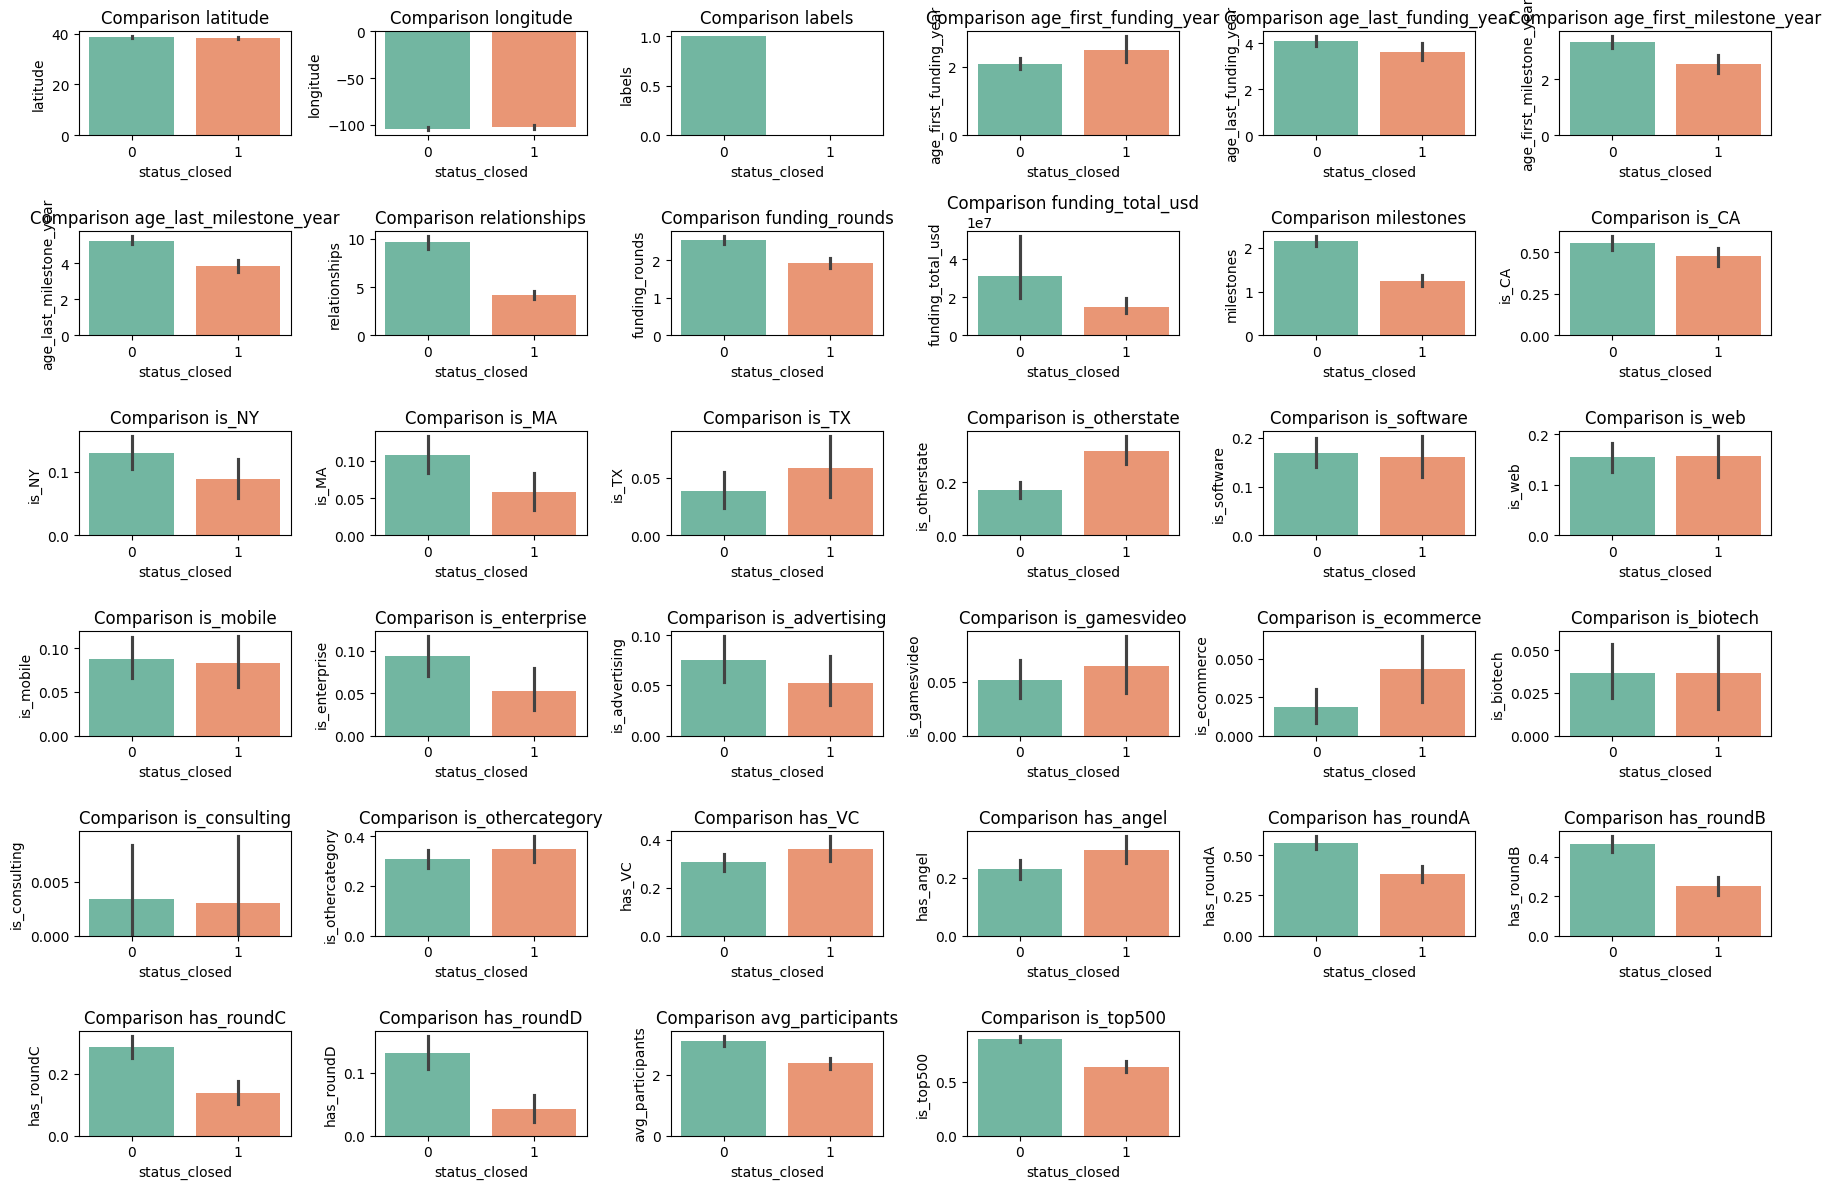

In [162]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your_data_df is your DataFrame with encoded data
your_data_df = encoded_data

# Choose variables to compare with the target variable
variables_to_compare = [
    'latitude', 'longitude', 'labels', 'age_first_funding_year',
    'age_last_funding_year', 'age_first_milestone_year', 'age_last_milestone_year',
    'relationships', 'funding_rounds', 'funding_total_usd', 'milestones',
    'is_CA', 'is_NY', 'is_MA', 'is_TX', 'is_otherstate', 'is_software', 'is_web',
    'is_mobile', 'is_enterprise', 'is_advertising', 'is_gamesvideo', 'is_ecommerce',
    'is_biotech', 'is_consulting', 'is_othercategory', 'has_VC', 'has_angel',
    'has_roundA', 'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants',
    'is_top500'
]

# Set up the matplotlib figure
plt.figure(figsize=(18, 12))

# Iterate through the selected variables and create bar plots
for i, variable in enumerate(variables_to_compare, 1):
    plt.subplot(6, 6, i)
    sns.barplot(x='status_closed', y=variable, hue='status_closed', data=your_data_df, palette='Set2', legend=False)
    plt.title(f'Comparison {variable}')

plt.tight_layout()
plt.show()




In [163]:
#The code you provided generates a grid of bar plots, each comparing a specific variable with the 'status_closed' target variable. The x-axis represents the 'status_closed' variable (0 or 1), the y-axis represents the values of the selected variable, and the hue represents the 'status_closed' variable, allowing you to compare how the distribution of the selected variable differs between the two classes.

#Here's what you can expect from the output:

#Each subplot corresponds to one of the variables specified in variables_to_compare.
#The bars in each subplot represent the distribution of the selected variable for both classes of the 'status_closed' target variable (0 and 1).
#The legend is disabled (legend=False) to avoid clutter, but you can enable it if needed.
#The resulting visualizations should help you analyze how each variable contributes to the classification task and whether there are noticeable differences between the classes.

#### 3. Preprocessing

Tranforming status(target variable) from categorical to numerical values 

2.Detect and address outliers.

3.Remove or impute incorrect or inconsistent data.

Statistical Summary

#### Define the inputs and the target

#### 5- Data Segmentation

#### 6- Model Training

#### 7- Model Testing

#### 8-  Model Evaluation:
#### Confusion Matrix and Analysis:

#### 10 - Print a classification report